# IMPORTS

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from cv2 import imread
from cv2 import imwrite
import scipy
from skimage.morphology import opening, disk, closing
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import imageio

from sklearn.cluster import KMeans

from PIL import Image, ImageDraw, ImageFont


In [187]:
image = Image.open('test.jpg')
pixels = image.load()
print(image.size)
print(pixels[80,160])

(225, 173)
254


In [ ]:
def thereisblackstrain(pixels,size):
    if
    

Number of HOUSES FOUND :  62


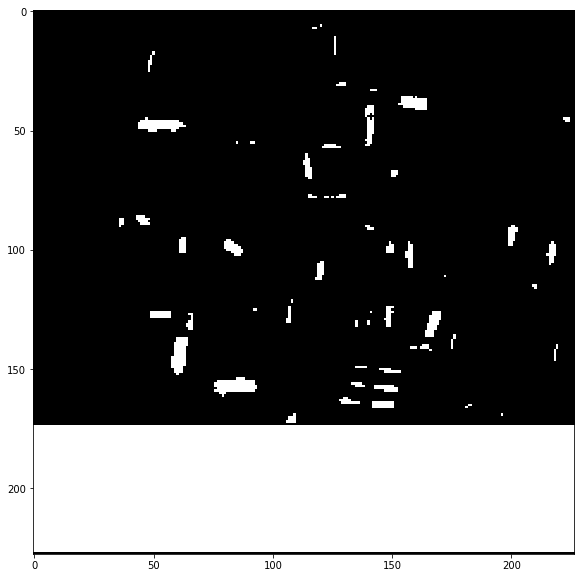

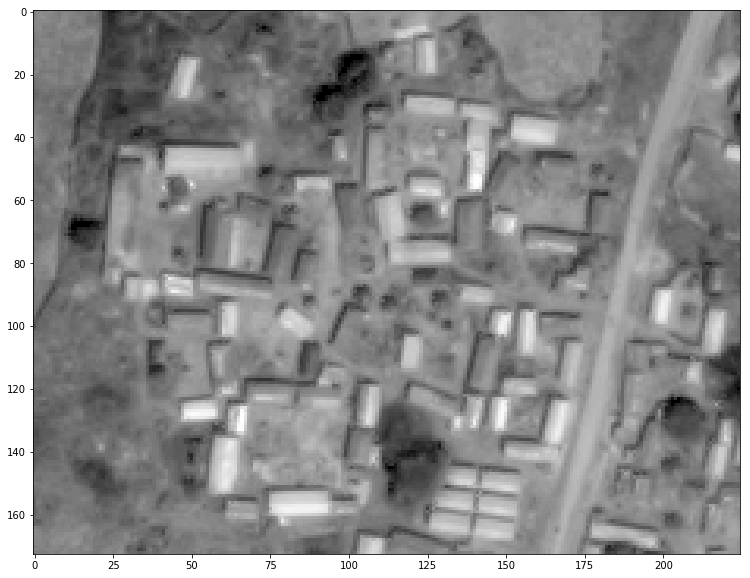

In [359]:
plt.figure(figsize = (20,10))
plt.imshow(line)

plt.figure(figsize = (20,10))
plt.imshow(bgr_img)

print("Number of HOUSES FOUND : % 3d"%(len(regs)))

Number of HOUSES FOUND :  62


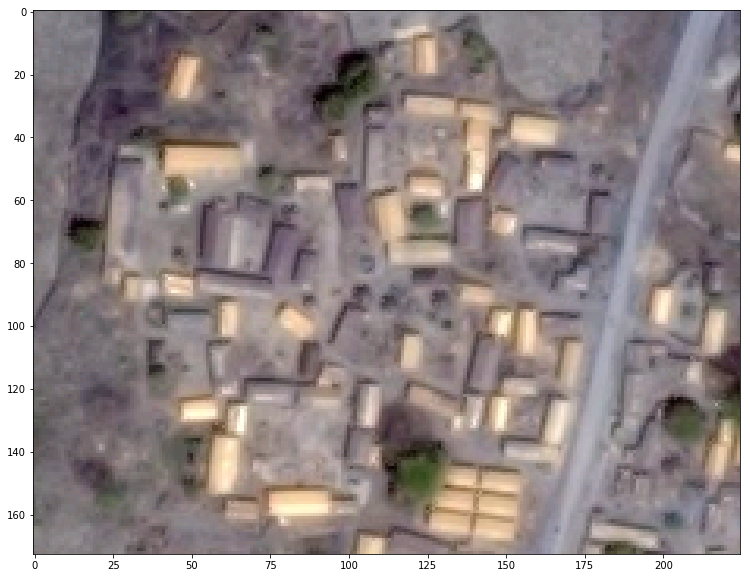

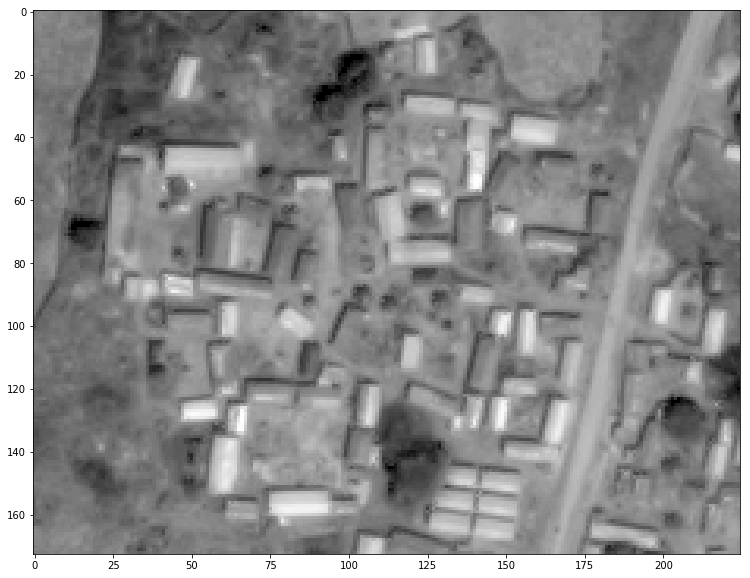

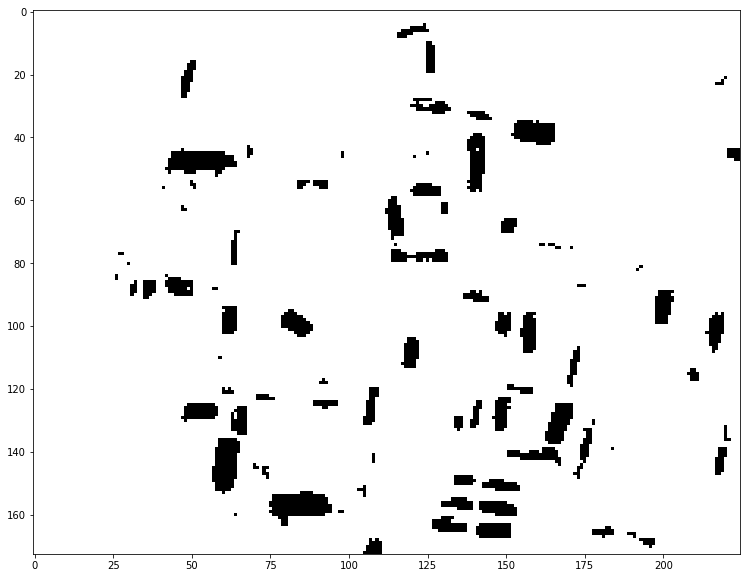

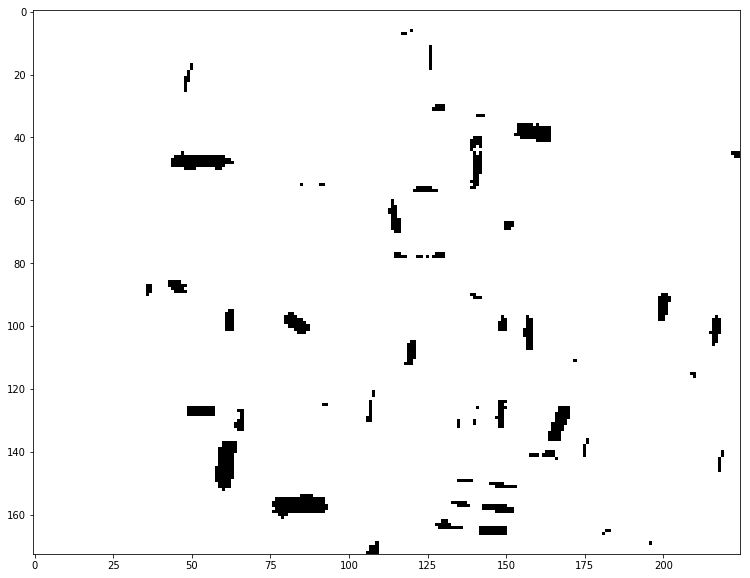

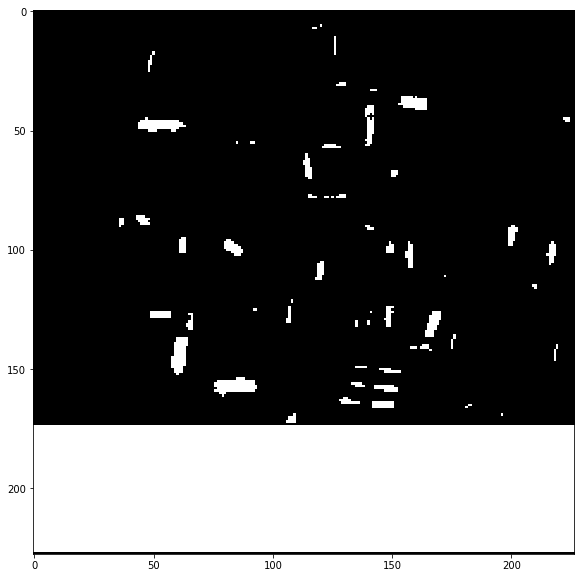

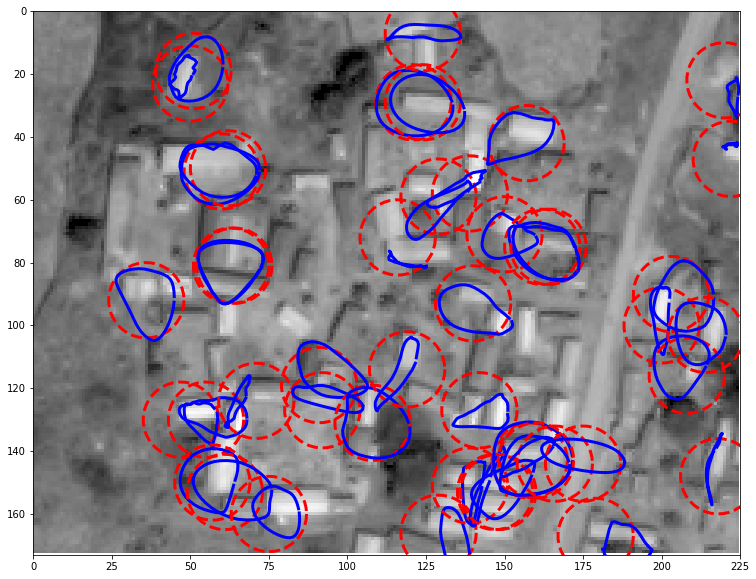

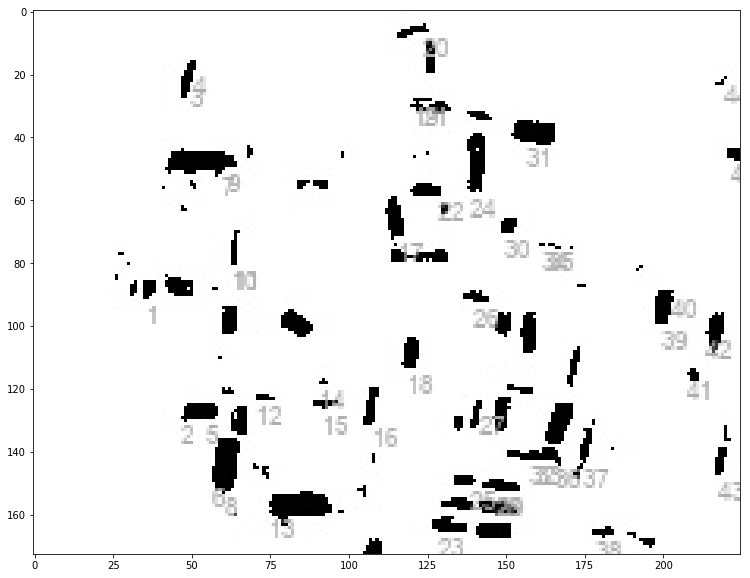

In [357]:
# Bilate filtered image. Sharpened image helps to give a better edge approximation.
# Bilate filtered image. Sharpened image helps to give a better edge approximation.
kk = imread('7_cropped.png',-1)
plt.figure(figsize = (20,10))
plt.imshow(kk)

bgr_img = imread('7_cropped.png',0)
plt.figure(figsize = (20,10))
plt.imshow(bgr_img)


ret,thresh5= cv2.threshold(bgr_img,180,255,cv2.THRESH_BINARY_INV)

#print (init)
'''
alpha Higher values make snake contract faster
beta Highervalue make snake smoother
Gamma Timestepping parameter
'''
plt.figure(figsize = (20,10))
plt.imshow(thresh5)

imwrite('test2.jpg',thresh5)


#smooth and threshold as image has compression artifacts (jpg)
im = ndimage.gaussian_filter(thresh5/2, 0.6)
im[im<10]=0
blobs, number_of_blobs = ndimage.label(im)

plt.figure(figsize = (20,10))
plt.imshow(blobs)

a=blobs/255

a=np.where(a==0, 2, a)
a=np.where(a==1, 0, a)
a=np.where(a==2, 1, a)

regs = locate_regions(a)

line = print_regions(regs)

plt.figure(figsize = (20,10))
plt.imshow(line)


print("Number of HOUSES FOUND : % 3d"%(len(regs)))




image = Image.open('test2.jpg')
pixels = image.load()
size = image.size
draw = ImageDraw.Draw(image)
font = ImageFont.truetype('Arial', 8)
i = 1
a=0

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.imshow(bgr_img)

for x in range(0, size[0], 1):
    
    for y in range(0, size[1], 1):
        if a==0 and pixels[x, y] == 254 :
            draw.text((x, y), str(i), fill='orange',font=font)
            i += 1
            s = np.linspace(0, 2*np.pi, 40)
            c = x + 12*np.cos(s)
            d = y + 12*np.sin(s)
            init = np.array([c, d]).T
            snake = active_contour(bgr_img, init,alpha=-0.006,beta=1)
            
            ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
            ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
            # ax.set_xticks([]), ax.set_yticks([])
            ax.axis([0, bgr_img.shape[1], bgr_img.shape[0], 0])
            
        a = pixels[x, y] 
        
plt.show()          

plt.figure(figsize = (20,10))
plt.imshow(image)




# plt.imshow(img, cmap='gray')


In [292]:
from collections import namedtuple

In [327]:
from functools import reduce

In [346]:
np.ones((2,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [356]:

Point = namedtuple('Point', 'x y')

def points_adjoin(p1, p2):
    # to accept diagonal adjacency, use this form
    #return -1 <= p1.x-p2.x <= 1 and -1 <= p1.y-p2.y <= 1
    return (-1 <= p1.x-p2.x <= 1 and p1.y == p2.y or
             p1.x == p2.x and -1 <= p1.y-p2.y <= 1)

def adjoins(pts, pt):
    return any(points_adjoin(p,pt) for p in pts)

def locate_regions(datastring):
    data = datastring
    regions = []
    datapts = [Point(x,y) 
                for y in range(len(data[0]))
                    for x in range(len(data)) if data[x][y]==1]
    for dp in datapts:
        # find all adjoining regions
        adjregs = [r for r in regions if adjoins(r,dp)]
        if adjregs:
            adjregs[0].add(dp)
            if len(adjregs) > 1:
                # joining more than one reg, merge
                regions[:] = [r for r in regions if r not in adjregs]
                regions.append(reduce(set.union, adjregs))
        else:
            # not adjoining any, start a new region
            regions.append(set([dp]))
    return regions

def region_index(regs, p):
    return next((i for i,reg in enumerate(regs) if p in reg), -1)

def print_regions(regs):
    maxx = max(p.x for r in regs for p in r)
    maxy = max(p.y for r in regs for p in r)
    allregionpts = reduce(set.union, regs)
    line = np.ones((maxy+4,maxy+3)) #  empty regular list
    
    for y in range(-1,maxy+2):
        
        for x in range(-1,maxx+2):
            p = Point(x, y)
            if p in allregionpts:
                line[x][y]=1
            else:
                line[x][y]=0


    return line
# test against data set


In [108]:
green = np.uint8([[[227,220,208]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
hsv_green

array([[[101,  21, 227]]], dtype=uint8)

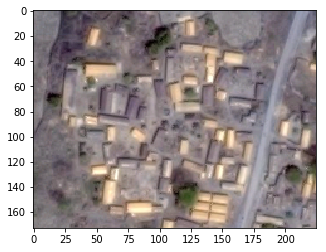

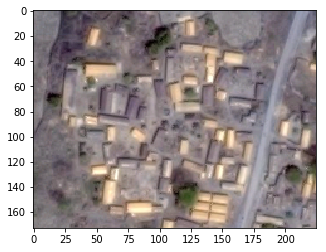

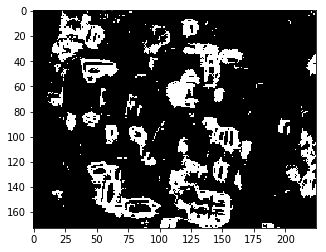

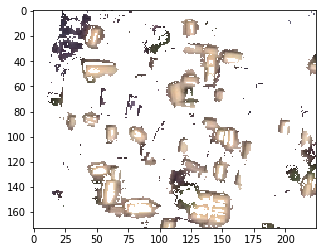

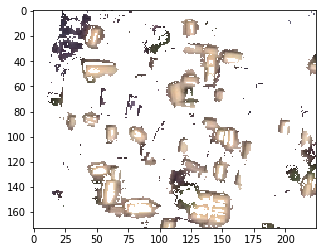

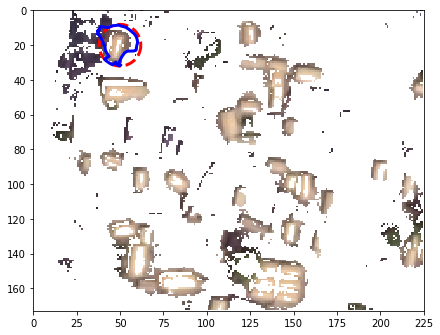

In [107]:
# Bilate filtered image. Sharpened image helps to give a better edge approximation.
bgr_img = imread('7_cropped.png',-1)

plt.figure()
plt.imshow(bgr_img)


frame = bgr_img

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV

lower_blue = np.array([106-80,10,50-5])
upper_blue = np.array([107+80,  81+5, 234+5])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

plt.figure()
plt.imshow(frame)

plt.figure()
plt.imshow(mask)

plt.figure()
plt.imshow(res)

img = res

s = np.linspace(0, 2*np.pi, 40)
x =  50 + 12*np.cos(s)
y = 20 + 12*np.sin(s)
init = np.array([x, y]).T
#print (init)
'''
alpha Higher values make snake contract faster
beta Highervalue make snake smoother
Gamma Timestepping parameter
'''


snake = active_contour(img, init,alpha=0.006)

plt.figure()
plt.imshow(img)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)





ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
# plt.imshow(img, cmap='gray')
plt.show()

In [5]:

def equalize(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img


def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

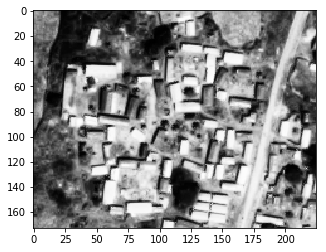

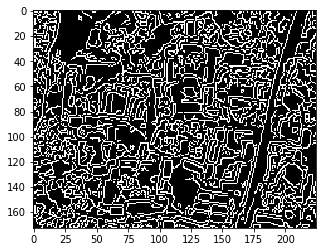

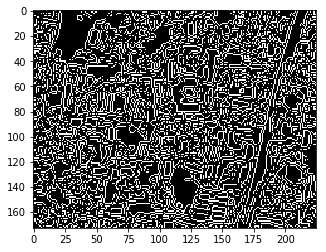

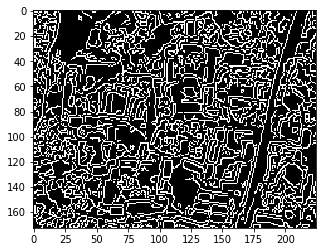

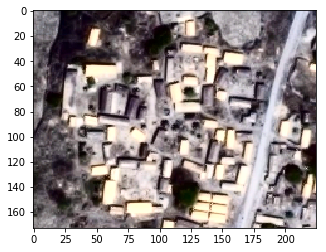

In [16]:
eq = imread('7_cropped.png')
x=equalize(eq)
gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
kernel_sharp = np.array((
         [-2, -2, -2],
         [-2, 17, -2],
         [-2, -2, -2]), dtype='int')



auto2 = auto_canny(x)
im1=cv2.filter2D(auto2, -1, kernel=kernel_sharp)
canny = auto_canny(im1)
plt.figure()
plt.imshow(auto2, cmap='gray')
plt.show()
plt.imshow(canny, cmap='gray')
plt.show()
plt.imshow(im1, cmap='gray')
plt.show()

plt.imshow(im_eq, cmap='gray')
plt.show()

[[183.          33.        ]
 [182.99802213  33.62894333]
 [182.99208861  34.25786178]
 ...
 [182.99208861  31.74213822]
 [182.99802213  32.37105667]
 [183.          33.        ]]


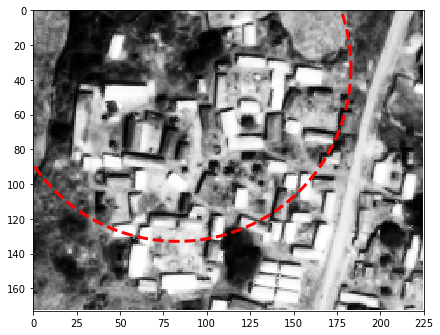

In [19]:
img = rgb2gray(eq)

s = np.linspace(0, 2*np.pi, 1000)
x = 83 + 100*np.cos(s)
y = 33 + 100*np.sin(s)
init = np.array([x, y]).T
print (init)
'''
alpha Higher values make snake contract faster
beta Highervalue make snake smoother
Gamma Timestepping parameter
'''
snake = active_contour(img, init, alpha=-1, beta=7, gamma=0.001, max_iterations=500)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
# plt.imshow(img, cmap='gray')
plt.show()


In [27]:

def createLineIterator(P1, P2, im):
    """
    Parameters:
        -P1: a numpy array that consists of the coordinate of the first point (x,y)
        -P2: a numpy array that consists of the coordinate of the second point (x,y)
        -img: the image being processed

    Returns:
        -it: a numpy array that consists of the coordinates and intensities of each pixel in the radii (shape: [numPixels, 3], row = [x,y,intensity])
    """
    imageH = im.shape[0]
    imageW = im.shape[1]
    P1X = P1[0]
    P1Y = P1[1]
    P2X = P2[0]
    P2Y = P2[1]

    # difference and absolute difference between points
    # used to calculate slope and relative location between points
    dX = P2X - P1X
    dY = P2Y - P1Y
    dXa = np.abs(dX)
    dYa = np.abs(dY)

    # predefine numpy array for output based on distance between points
    itbuffer = np.empty(shape=(np.maximum(dYa, dXa), 3), dtype=np.float32)
    itbuffer.fill(np.nan)

    # Obtain coordinates along the line using a form of Bresenham's algorithm
    negY = P1Y > P2Y
    negX = P1X > P2X
    if P1X == P2X:  # vertical line segment
        itbuffer[:, 0] = P1X
        if negY:
            itbuffer[:, 1] = np.arange(P1Y - 1, P1Y - dYa - 1, -1)
        else:
            itbuffer[:, 1] = np.arange(P1Y + 1, P1Y + dYa + 1)
    elif P1Y == P2Y:  # horizontal line segment
        itbuffer[:, 1] = P1Y
        if negX:
            itbuffer[:, 0] = np.arange(P1X - 1, P1X - dXa - 1, -1)
        else:
            itbuffer[:, 0] = np.arange(P1X + 1, P1X + dXa + 1)
    else:  # diagonal line segment
        steepSlope = dYa > dXa
        if steepSlope:
            slope = float(dX) / float(dY)
            if negY:
                itbuffer[:, 1] = np.arange(P1Y - 1, P1Y - dYa - 1, -1)
            else:
                itbuffer[:, 1] = np.arange(P1Y + 1, P1Y + dYa + 1)
            itbuffer[:, 0] = (slope * (itbuffer[:, 1] - P1Y)).astype(np.int) + P1X
        else:
            slope = float(dY) / float(dX)
            if negX:
                itbuffer[:, 0] = np.arange(P1X - 1, P1X - dXa - 1, -1)
            else:
                itbuffer[:, 0] = np.arange(P1X + 1, P1X + dXa + 1)
            itbuffer[:, 1] = (slope * (itbuffer[:, 0] - P1X)).astype(np.int) + P1Y

    # Remove points outside of image
    colX = itbuffer[:, 0]
    colY = itbuffer[:, 1]
    itbuffer = itbuffer[(colX >= 0) & (colY >= 0) & (colX < imageW) & (colY < imageH)]

    # Get intensities from img ndarray
    itbuffer[:, 2] = im[itbuffer[:, 1].astype(np.uint), itbuffer[:, 0].astype(np.uint)]

    return itbuffer



In [30]:

im = eq
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)   # 1st image use
# img = cv2.bitwise_not(img)

rows, cols = img.shape
white_img = cv2.bitwise_not(np.zeros(im.shape, np.uint8))
white_polygon = cv2.bitwise_not(np.zeros(im.shape, np.uint8))
white_gray = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)

v = np.median(img)
sigma = 0.33
lower_thresh = int(max(0, (1.0 - sigma) * v))
upper_thresh = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img, lower_thresh, upper_thresh)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 30)
lines = np.reshape(lines, (lines.shape[0], lines.shape[2]))

kmeans = KMeans(n_clusters=20).fit(lines)

for line in kmeans.cluster_centers_:
    rho, theta = line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv2.line(white_gray, (x1, y1), (x2, y2), 0, 2)

    pixels = createLineIterator((x1, y1), (x2, y2), img)
    pixels = pixels.astype(int)
    pixel_len = len(pixels)

    for i in range(pixel_len):
        x, y, intensity = pixels[i]
        if 0 < y < rows - 1 and 0 < x < cols - 1:
            # patch = edges[x - k_row/2: x + k_row/2,
            #         y - k_col/2: y + k_col/2]
            sum_patch = edges[y, x] + edges[y - 1, x] + edges[y + 1, x] + edges[y, x - 1] + edges[y - 1, x - 1] + edges[
                y + 1, x - 1] + edges[y, x + 1] + edges[y - 1, x + 1] + edges[y + 1, x + 1]
            if sum_patch > 0:
                img[y, x] = 255
    
x1 = []
y1 = []
m = np.sort(m)
c = np.sort(c)
print (m, c)
for i in range(len(m)-1):
    for j in range(len(c)-1):
        if m[i] - m[i+1] != 0:
            x = ((c[j + 1] - c[j]) / (m[i] - m[i + 1]))
            y = (((m[i]*c[i+1]) - (m[i+1]*c[j])) / (m[i] - m[i+1]))
            if 0 < x < cols and 0 < y < rows:
                x1.append(x)
                y1.append(y)
x1 = np.array(x1)
y1 = np.array(y1)
intersect = (np.column_stack((x1, y1)))
print (intersect)


for i, j, k in zip(r, c, s):
    r[i] = x1*c[j] + y1*s[k]

contours = cv2.findContours(white_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

for cnt in contours:
    cv2.drawContours(white_polygon, cnt, 0, 0, -1)
    man = []
    intense = []
    for col in range(cols):
        for row in range(rows):
            if cv2.pointPolygonTest(cnt, (col, row), False) == 1:
                man.append((row, col))
    for k in man:
        intense.append(im[k])
    intensity = mean(intense)
    # print (intensity)
    if intensity > 170:
        cv2.drawContours(white_polygon, [cnt], 0, 0, -1)

    # mean_val = np.mean(cnt)
    # if mean_val < 120:
    #     img[cnt] = 255
# man = map(int, man)
# for i, j in zip(contours, man):
#     if j < 90:
#         cv2.drawContours(img, i, 0, thickness=-1, color=0)
#     else:
#         cv2.drawContours(img, i, 0, thickness=-1, color=255)
# for cnt in contours:
#     cv2.drawContours(im, [cnt], 0, 0, -1)
white_gray1 = cv2.cvtColor(white_polygon, cv2.COLOR_BGR2GRAY)
opened = opening(white_gray1, selem=disk(4))
# kernel_sharp = np.array((
#          [-2, -2, -2],
#          [-2, 17, -2],
#          [-2, -2, -2]), dtype='int')
# opens = cv2.filter2D(opened, -1, kernel_sharp)
opened = Image.fromarray(opened)
opened.save('opened.png')
plt.imshow(opened, cmap='gray')
plt.show()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in ubyte_scalars


NameError: name 'm' is not defined